<a href="https://colab.research.google.com/github/youngchul-sung/start-tf2-programming/blob/master/Chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


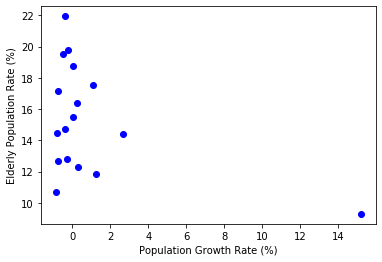

In [2]:
# 4.2 지역별 인구증가율과 고령인구비율 시각화: 극단치 제거
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

plt.plot(population_inc, population_old, 'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a: -0.355834147915461 b: 15.669317743971302


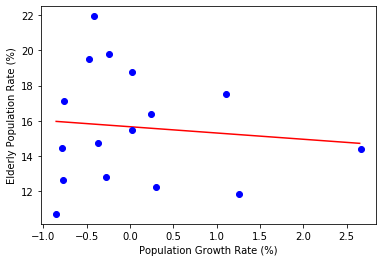

In [3]:
# 4.3 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 0.1214687 b: 6.7000523 loss: 90.041916
199 a: -0.11686525 b: 11.189758 loss: 29.80071
299 a: -0.2563473 b: 13.804216 loss: 13.251338
399 a: -0.32178876 b: 15.031049 loss: 10.187246
499 a: -0.3463052 b: 15.490677 loss: 9.812641
599 a: -0.35366228 b: 15.628601 loss: 9.782457
699 a: -0.35543397 b: 15.661817 loss: 9.78086
799 a: -0.35577542 b: 15.668216 loss: 9.780804
899 a: -0.3558272 b: 15.669189 loss: 9.780803
999 a: -0.3558332 b: 15.669302 loss: 9.780804


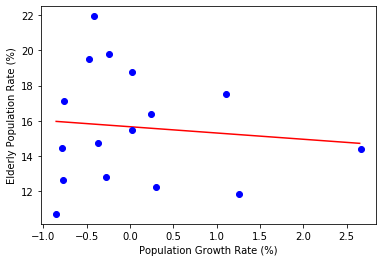

In [4]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 4.1712537 b: -6.009313 c: 6.065159 loss: 73.58349
199 a: 2.96716 b: -4.854957 c: 9.975639 loss: 34.021923
299 a: 1.4086512 b: -2.512044 c: 12.698416 loss: 17.048214
399 a: 0.4043426 b: -0.99064654 c: 14.42696 loss: 11.290621
499 a: -0.143764 b: -0.16082017 c: 15.372449 loss: 9.802361
599 a: -0.40321755 b: 0.2319447 c: 15.820211 loss: 9.507047
699 a: -0.5100864 b: 0.39372098 c: 16.00466 loss: 9.461927
799 a: -0.54844654 b: 0.4517904 c: 16.070868 loss: 9.456623
899 a: -0.5604367 b: 0.46994033 c: 16.09156 loss: 9.456144
999 a: -0.5636894 b: 0.47486365 c: 16.097176 loss: 9.456112


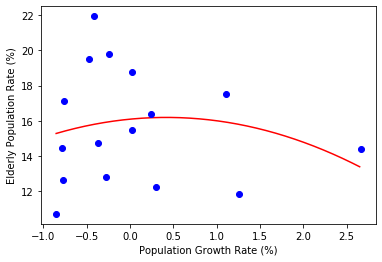

In [5]:
# 4.5 텐서플로우를 이용해서 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: -1.3325264 b: 6.2772202 c: -3.8635201 d: 6.4152875 loss: 61.810238
199 a: -2.087615 b: 7.0491824 c: -2.1608624 d: 9.939677 loss: 30.793447
299 a: -1.7019173 b: 5.201183 c: -0.9098279 d: 12.096888 loss: 20.159164
399 a: -0.9261363 b: 2.7943654 c: -0.57666266 d: 13.6176195 loss: 14.2049885
499 a: -0.20407926 b: 0.682609 c: -0.4834282 d: 14.764641 loss: 10.864313
599 a: 0.3537938 b: -0.9324082 c: -0.43892533 d: 15.614913 loss: 9.192045
699 a: 0.74885875 b: -2.074091 c: -0.41066065 d: 16.212387 loss: 8.447697
799 a: 1.0105741 b: -2.8301165 c: -0.39239484 d: 16.607454 loss: 8.152557
899 a: 1.1734246 b: -3.3004944 c: -0.38111213 d: 16.853142 loss: 8.048287
999 a: 1.2686887 b: -3.575646 c: -0.37452623 d: 16.99684 loss: 8.015495


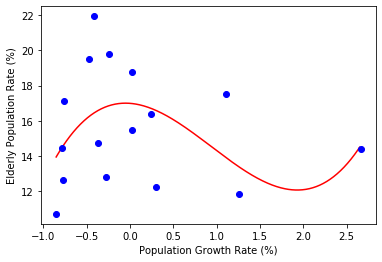

In [6]:
# 4.6 텐서플로우를 이용해서 3차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(lr=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

In [7]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 4.8 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Train on 16 samples
Epoch 1/10
16/16 [==============================] - 0s 25ms/sample - loss: 254.5483
Epoch 2/10
16/16 [==============================] - 0s 493us/sample - loss: 112.3543
Epoch 3/10
16/16 [==============================] - 0s 423us/sample - loss: 9.5825
Epoch 4/10
16/16 [==============================] - 0s 399us/sample - loss: 9.5065
Epoch 5/10
16/16 [==============================] - 0s 376us/sample - loss: 9.4867
Epoch 6/10
16/16 [==============================] - 0s 323us/sample - loss: 9.4696
Epoch 7/10
16/16 [==============================] - 0s 440us/sample - loss: 9.4532
Epoch 8/10
16/16 [==============================] - 0s 396us/sample - loss: 9.4370
Epoch 9/10
16/16 [==============================] - 0s 410us/sample - loss: 9.4209
Epoch 10/10
16/16 [==============================] - 0s 317us/sample - loss: 9.4046


In [9]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X)

array([[15.881166 ],
       [15.79022  ],
       [14.867735 ],
       [15.971195 ],
       [15.0520935],
       [15.910326 ],
       [15.967937 ],
       [15.911821 ],
       [15.794643 ],
       [15.940979 ],
       [15.75869  ],
       [15.930098 ],
       [15.962959 ],
       [15.9725895],
       [15.799044 ],
       [13.980076 ]], dtype=float32)

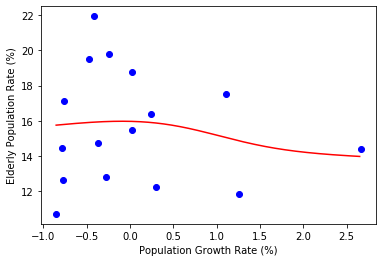

In [10]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

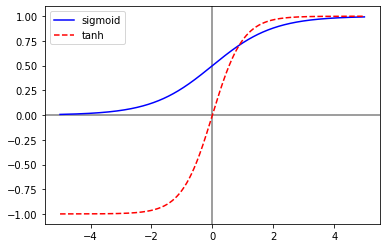

In [11]:
# 그림 4.2 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

In [12]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [13]:
# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean()
x_std = train_X.std()
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean()
y_std = train_Y.std()
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


In [14]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_3 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


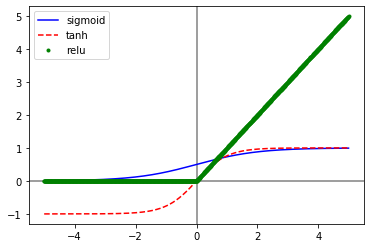

In [15]:
# 그림 4.5 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [16]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 1ms/sample - loss: 2.1922 - val_loss: 1.5428
Epoch 2/25
303/303 [==============================] - 0s 128us/sample - loss: 0.7583 - val_loss: 1.1111
Epoch 3/25
303/303 [==============================] - 0s 115us/sample - loss: 0.7803 - val_loss: 1.0319
Epoch 4/25
303/303 [==============================] - 0s 118us/sample - loss: 0.7200 - val_loss: 1.0515
Epoch 5/25
303/303 [==============================] - 0s 103us/sample - loss: 0.6478 - val_loss: 1.0518
Epoch 6/25
303/303 [==============================] - 0s 136us/sample - loss: 0.6420 - val_loss: 1.0996
Epoch 7/25
303/303 [==============================] - 0s 143us/sample - loss: 0.6545 - val_loss: 1.0250
Epoch 8/25
303/303 [==============================] - 0s 138us/sample - loss: 0.6458 - val_loss: 1.1492
Epoch 9/25
303/303 [==============================] - 0s 152us/sample - loss: 0.6994 - val_loss: 1.0063
Epoch 10/25
303/303 

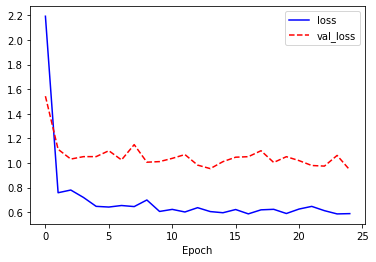

In [17]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [18]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 105us/sample - loss: 0.7130


0.7129562508826163

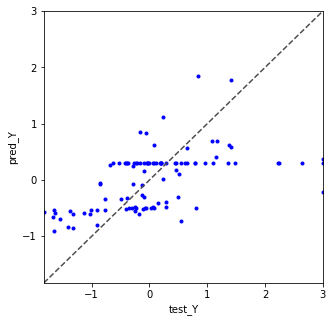

In [19]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [20]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 1ms/sample - loss: 1.0960 - val_loss: 1.0862
Epoch 2/25
303/303 [==============================] - 0s 128us/sample - loss: 0.7093 - val_loss: 1.1640
Epoch 3/25
303/303 [==============================] - 0s 118us/sample - loss: 0.6805 - val_loss: 1.0870
Epoch 4/25
303/303 [==============================] - 0s 115us/sample - loss: 0.6774 - val_loss: 1.0166
Epoch 5/25
303/303 [==============================] - 0s 121us/sample - loss: 0.6454 - val_loss: 1.0437
Epoch 6/25
303/303 [==============================] - 0s 120us/sample - loss: 0.6685 - val_loss: 1.0998
Epoch 7/25
303/303 [==============================] - 0s 117us/sample - loss: 0.6316 - val_loss: 1.0717
Epoch 8/25
303/303 [==============================] - 0s 126us/sample - loss: 0.6419 - val_loss: 1.0661
Epoch 9/25
303/303 [==============================] - 0s 122us/sample - loss: 0.6117 - val_loss: 1.1021
Epoch 10/25
303/303 

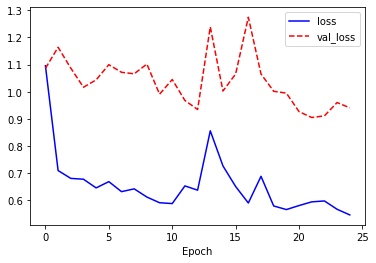

In [21]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [22]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 94us/sample - loss: 0.6753


0.6753455190097585

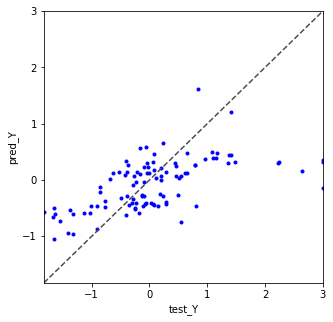

In [23]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()